The main objective of this exercise is to import the file named "ecommerce2.csv", clean unnecessary data (such as NaN, null values, etc.), and analyze the organization of rows and columns to facilitate data querying and future studies related to this file.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sqlalchemy import engine
from pandasql import sqldf

I am going to create the following statement to export  this file easely, enabling deeper queries whit SQL in MySQL later on.

In [3]:
pysqldf=lambda q: sqldf(q,globals())

In [4]:
df=pd.read_csv("ecommerce2.csv")
print(df.head(3))

                         Transaction_ID    Customer_ID   Product_ID  \
0  8b460852-7c64-46fa-998b-b0976879d082    Customer_65  Product_224   
1  418612e7-8744-4ba3-bb0c-105b47e2a968  Customer_1910  Product_584   
2  5bc3b98f-cb0c-4b12-947c-df8bbb35a73e  Customer_2306  Product_374   

  Transaction_Date  Units_Sold  Discount_Applied  Revenue  Clicks  \
0       2024-10-06         134              0.14   305.54      11   
1       2024-10-29         109              0.30  1102.19      15   
2       2024-04-04         116              0.04   471.29      16   

   Impressions  Conversion_Rate         Category  Region  Ad_CTR  Ad_CPC  \
0           65             0.17      Electronics  Europe  0.0180    0.55   
1          201             0.07  Home Appliances    Asia  0.1589    0.40   
2          199             0.08             Toys    Asia  0.0596    1.50   

   Ad_Spend  
0      9.90  
1     63.56  
2     89.40  


Let’s explore in more detail the data type, shape, and key statistics to better understand how we can work with them.

In [5]:
df.shape

(100000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB


In [7]:
df.describe()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,128.328580,0.149871,553.110811,24.539170,254.539060,0.198138,0.104988,1.051250,110.477240
std,49.679873,0.086692,428.366294,14.412477,141.466606,0.361187,0.054806,0.549252,87.015846
min,51.000000,0.000000,7.650000,0.000000,10.000000,0.000000,0.010000,0.100000,1.050000
25%,84.000000,0.070000,221.260000,12.000000,132.000000,0.050000,0.057500,0.580000,38.610000
50%,127.000000,0.150000,428.155000,25.000000,254.000000,0.100000,0.105200,1.050000,87.240000
75%,166.000000,0.220000,805.865000,37.000000,377.000000,0.190000,0.152300,1.530000,164.220000
max,716.000000,0.300000,5704.180000,49.000000,499.000000,4.900000,0.200000,2.000000,399.600000


In [8]:
df.duplicated().sum()

np.int64(0)

In this case, we don´t have any duplicted values

To ensure uninterrupted analysis, let’s confirm that there are no null values using the following statement. 

In [9]:
df.dropna()


,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,90320769-c92d-4142-b112-4bac46d44007,Customer_2613,Product_472,2024-04-21,179,0.11,255.11,41,428,0.10,Electronics,Europe,0.1073,1.48,158.80
99996,e91a3cfa-bd5b-475a-825d-6efe939ff974,Customer_19127,Product_787,2024-09-17,178,0.12,1302.60,6,363,0.02,Books,North America,0.1164,0.36,41.90
99997,b0e10e62-e7c4-4092-876a-12abc9ebe3e8,Customer_4685,Product_745,2024-10-23,212,0.26,491.36,5,419,0.01,Electronics,North America,0.1235,0.20,24.70
99998,97980811-e107-4369-888c-31cd8763471f,Customer_16377,Product_39,2024-01-03,180,0.09,598.91,41,12,3.42,Electronics,Europe,0.1566,0.96,150.34


As we can see, the number of rows and columns matches the original table, confirming that all values are valid. (100000 rows x 15 columns)

In [10]:
df=df.dropna(subset=["Customer_ID"])

In [11]:
df.head(5)

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


One question we could ask is: which region has the highest sales for this business?

In [12]:
sales_by_country=df.groupby("Region")["Units_Sold"].sum().reset_index()
print(sales_by_country)

          Region  Units_Sold
0           Asia     3789836
1         Europe     4150933
2  North America     4892089


Also what is the volume per category for each one?

In [13]:
voloum_per_category=df.groupby("Category")["Units_Sold"].sum().reset_index()
print(voloum_per_category)

          Category  Units_Sold
0            Books     2219356
1         Clothing     2471409
2      Electronics     3001900
3  Home Appliances     2370894
4             Toys     2769299


In the same way, we want check what is the revenue for each category

In [14]:
revenue_per_category=(df.groupby("Category")["Revenue"].sum()/1e6).reset_index()
print(revenue_per_category)

          Category    Revenue
0            Books  11.195312
1         Clothing  11.034899
2      Electronics  11.326820
3  Home Appliances  10.559207
4             Toys  11.194842


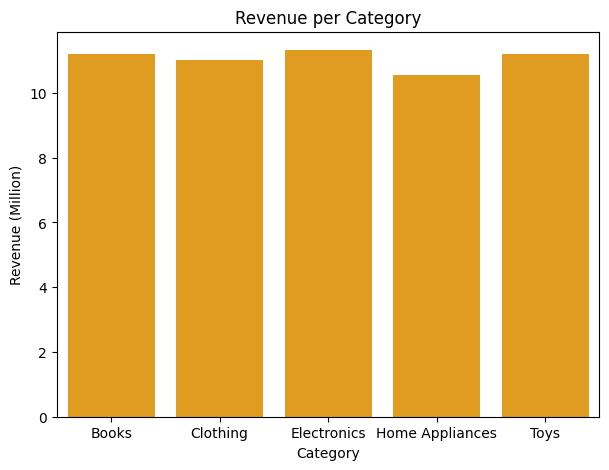

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(x="Category",y="Revenue",data=revenue_per_category,color="orange")
plt.title("Revenue per Category")
plt.xlabel("Category")
plt.ylabel("Revenue (Million)")
plt.show()


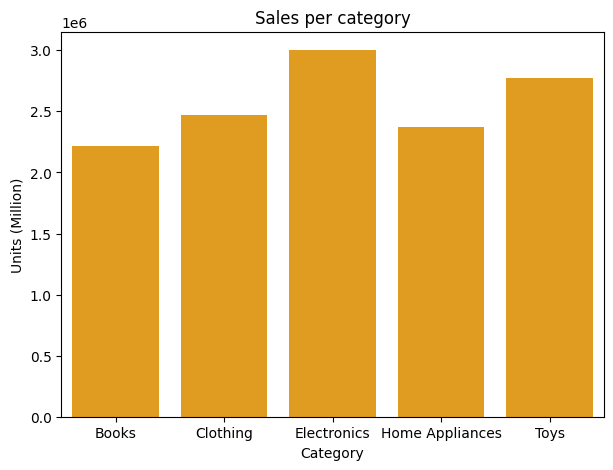

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(x="Category",y="Units_Sold",data=voloum_per_category,color="orange")
plt.title("Sales per category")
plt.xlabel("Category")
plt.ylabel("Units (Million)")
plt.show()

Which region has the highest CTR (Click-Through Rate) in campaigns?

In [17]:
ctr_per_region=df.groupby("Region")["Ad_CTR"].sum().reset_index()
print(ctr_per_region)

          Region     Ad_CTR
0           Asia  3508.5728
1         Europe  3483.3503
2  North America  3506.8496


Are there monthly trends in sales or revenue?

In [18]:
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])
df["Month"]=df["Transaction_Date"].dt.month

In [19]:
monthly_revenue=df.groupby("Month")["Revenue"].sum().reset_index()
print(monthly_revenue)

    Month     Revenue
0       1  4665609.02
1       2  4312157.04
2       3  4705422.31
3       4  4406829.73
4       5  4645304.43
5       6  4614620.94
6       7  4572138.90
7       8  4579761.33
8       9  4551504.34
9      10  4771718.89
10     11  4828945.03
11     12  4657069.11


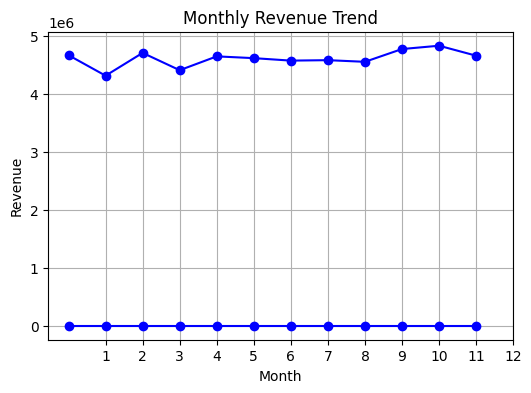

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(monthly_revenue.index,monthly_revenue.values, marker="o", color="blue")

# Etiquetas y título
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

The marketing department wants to know the average conversion rate of each category, to know which ones they need to improve on.

In [21]:
conversion_rate_category=df.groupby("Category")["Conversion_Rate"].mean().reset_index()
print(conversion_rate_category)

          Category  Conversion_Rate
0            Books         0.198009
1         Clothing         0.197566
2      Electronics         0.199594
3  Home Appliances         0.200063
4             Toys         0.195477


Now it’s time to examine the relationships between the data and identify which data makes sense to study.

In [22]:
correlation=df[["Units_Sold","Discount_Applied","Revenue","Clicks","Impressions","Conversion_Rate"]].corr()
print(correlation)

                  Units_Sold  Discount_Applied   Revenue    Clicks  \
Units_Sold          1.000000         -0.000895  0.044226  0.003540   
Discount_Applied   -0.000895          1.000000 -0.129227 -0.002911   
Revenue             0.044226         -0.129227  1.000000  0.005784   
Clicks              0.003540         -0.002911  0.005784  1.000000   
Impressions         0.001255         -0.003697  0.004750  0.002034   
Conversion_Rate     0.000653          0.001598 -0.002019  0.321004   

                  Impressions  Conversion_Rate  
Units_Sold           0.001255         0.000653  
Discount_Applied    -0.003697         0.001598  
Revenue              0.004750        -0.002019  
Clicks               0.002034         0.321004  
Impressions          1.000000        -0.507006  
Conversion_Rate     -0.507006         1.000000  


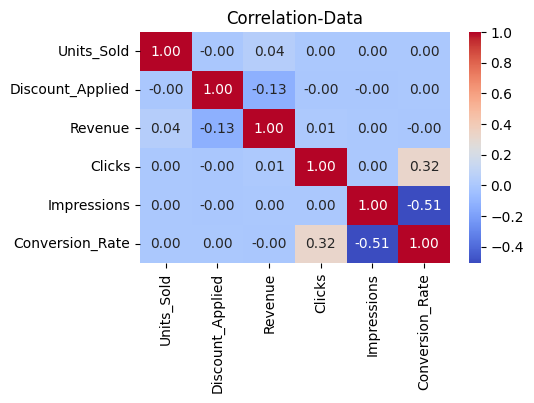

In [23]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Correlation-Data")
plt.show()

As we can see, there is a slight relationship between clicks and conversion_rate, and the heatmap also shows 
that as impressions increase, conversion_rate decreases.

Finally let´s add a line to export the relevant columns that late we are goin to work with in SQL.

In [24]:
q='''
Select
Product_ID,
Units_Sold,
Category,
Region
from df
where region = "Asia"
'''
df_export=pysqldf(q)

As a result, we now have the updated file ready to work with, containing all the changes we made in the lines above.

In [25]:
df_export.to_csv("Ecommerce2-update.csv")